# Polynomial Regression

Contents
- [Overview](#Overview)
- [Hows it Work && OLS](#Hows-it-Work-and-OLS)
- [Measuring how Good a Regression is](#Measuring-how-Good-a-Regression-is)
  - [Using R Squared](#Using-R-Squared)
  - [Computing R Squared](#Computing-R-Squared)
  - [Interpreting R Squared](#Interpreting-R-Squared)
- [In Python](#In-Python)
  - [The Data to Compare](#The-Data-to-Compare)
  - [Scatterplots](#Scatterplots)  
  - [Using stats to calculate linear regression](#Using-stats-to-calculate-linear-regression)

# Overview
- a curved best-fit-line
- not all relationships are linear

# Hows it Work
- Linear formula
  - y = mx + b
    - HERE is a "first order" or "first degree"  polynomial, referring to thex power 

# Measuring how Good a Regression is
## Using R Squared
- the coefficient of determination

The fraction of the total variation

## Computing R Squared
- numerator
  - sum of squared-errors

- denominator
  - sum of squared variation from mean  
  
## Interpreting R Squared
Range is from 0 to 1  
0 is bad, no variance is captured, fit is terrible    
1 is good, all variance is captured, fit is great

# In Python

## The DataFrame

In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
from pylab import *

# save file-data to var, using pandas read_file method
# assign to a DataFrame
df = pd.read_csv("./cleaned.csv")

# output a short-exampe of the data
df.head()
# df

,id,Geographic Area Name,Total:,Below poverty level:,Percent below poverty level:,Total:AGE:Under 18 years,Below poverty level:AGE:Under 18 years,Percent below poverty level:AGE:Under 18 years,Total:AGE:Under 18 years!!Under 5 years,Below poverty level:AGE:Under 18 years!!Under 5 years,...,Percent below poverty level:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:200 percent of poverty level,Total:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:300 percent of poverty level,Below poverty level:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:300 percent of poverty level,Percent below poverty level:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:300 percent of poverty level,Total:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:400 percent of poverty level,Below poverty level:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:400 percent of poverty level,Percent below poverty level:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:400 percent of poverty level,Total:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:500 percent of poverty level,Below poverty level:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:500 percent of poverty level,Percent below poverty level:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:500 percent of poverty level
0,0400000US02,Alaska,720869,78620,10.9,180258,25327,14.1,51329,8384,...,(X),296900,(X),(X),393946,(X),(X),480098,(X),(X)
1,0400000US23,Maine,1301941,151541,11.6,240662,34878,14.5,61960,9594,...,(X),604470,(X),(X),798827,(X),(X),954763,(X),(X)
2,0400000US37,North Carolina,10100431,1417873,14.0,2257634,455971,20.2,586457,127425,...,(X),5151267,(X),(X),6549114,(X),(X),7602253,(X),(X)
3,0400000US29,Missouri,5943658,786330,13.2,1347491,247209,18.3,362024,72100,...,(X),2916185,(X),(X),3823677,(X),(X),4469204,(X),(X)
4,0400000US42,Pennsylvania,12394000,1517870,12.2,2594554,434736,16.8,687014,121224,...,(X),5450455,(X),(X),7240999,(X),(X),8637022,(X),(X)


# The Data to Compare
Here, 2 vars
- percent below poverty between ages 35- 64  
- percent where education is @ specific education level
  - NOTE: there are a few education levels, so there will be a few comparisons

In [67]:
age_cols = df.filter(like="Percent below poverty level:AGE")
ed_poverty_totals = df.filter(like="Percent below poverty level:EDUCATIONAL ATTAINMENT:")
ed_poverty_totals.head()

# AgeRange Column
below_p_18_to_35 = age_cols["Percent below poverty level:AGE:18 to 64 years!!18 to 34 years"]

# Education-Columns
no_hs_pct = df["Percent below poverty level:EDUCATIONAL ATTAINMENT:Population 25 years and over!!Less than high school graduate"]
hs_grads_pct = df["Percent below poverty level:EDUCATIONAL ATTAINMENT:Population 25 years and over!!High school graduate (includes equivalency)"]
some_college_pct = df["Percent below poverty level:EDUCATIONAL ATTAINMENT:Population 25 years and over!!Some college, associate's degree"]
bach_plus_pct = df["Percent below poverty level:EDUCATIONAL ATTAINMENT:Population 25 years and over!!Bachelor's degree or higher"]

0      8.1
1      9.7
2      9.9
3      9.4
4      9.4
5     10.0
6      8.3
7     10.1
8      8.0
9      9.6
10    12.5
11     8.1
12     9.6
13     8.7
14     6.9
15    14.6
16    11.0
17     9.8
18     7.4
19    10.0
20    13.5
21    10.7
22     7.8
23    35.0
24     8.6
25     8.1
26     6.9
27     7.5
28    10.4
29    10.2
30    10.2
31     8.3
32     6.9
33     9.5
34     9.2
35    11.8
36    11.6
37     8.6
38     9.7
39     7.9
40     5.0
41     8.3
42    12.2
43     9.2
44     7.0
45    10.7
46     9.8
47     9.7
48     8.2
49    17.7
50     6.2
51    10.1
Name: Percent below poverty level:EDUCATIONAL ATTAINMENT:Population 25 years and over!!Some college, associate's degree, dtype: float64

# Scatterplots

## below poverty vs no highscool

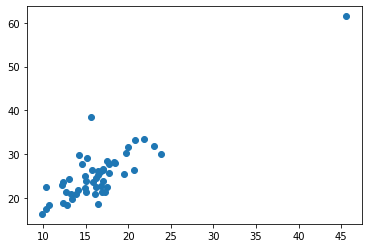

In [24]:
scatter(below_p_18_to_35, no_hs_pct)

## below poverty vs hs grads

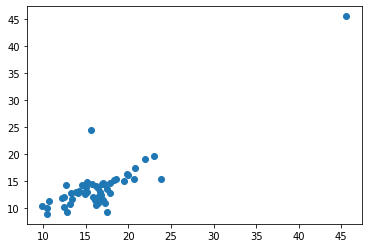

In [25]:
scatter(below_p_18_to_35, hs_grads_pct)

## below poverty vs some college

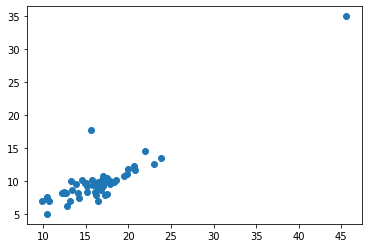

In [68]:
scatter(below_p_18_to_35, some_college_pct)

## below poverty vs bachelors or more

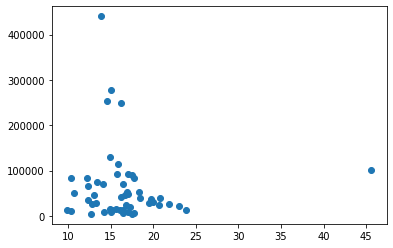

In [27]:
scatter(below_p_18_to_35, bach_plus_pct)

# Using stats to calculate linear regression

## plotting the bestfit line on the scatterplot no highschool

--SLOPE--
1.1453532110457187

--INTERCEPT--
6.475106386126733

--R VAL--
0.8653491360371064

--p_value--
1.2869593616315114e-16

--STAND. DEV. ERR--
0.0938096916552003

** Deducted, r-squared
0.7488291272401665


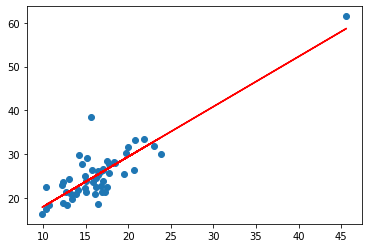

In [60]:
import matplotlib.pyplot as plt

slope, intercept, r_value, p_value, std_err = stats.linregress(below_p_18_to_35, no_hs_pct)
print('--SLOPE--')
print(str(slope))
print('')
print('--INTERCEPT--')
print(str(intercept))
print('')
print('--R VAL--')
print(str(r_value))
print('')
print('--p_value--')
print(str(p_value))
print('')
print('--STAND. DEV. ERR--')
print(str(std_err))
print('')
print('** Deducted, r-squared')
print(str(r_value ** 2))

# takes x value, slope && y-intercept
def yVal(xVal, slope, int):
    return slope * xVal + int

# using existing data and y = mx+b equation, make best-fit-line y-values
fitLineYVals = yVal(below_p_18_to_35, slope, intercept)

#plot the scatter again
plt.scatter(below_p_18_to_35, no_hs_pct)

# superimpose the line, red
plt.plot(below_p_18_to_35, fitLineYVals, c="r")
plt.show()

## bestfit hs grads

--SLOPE--
0.881787059304219

--INTERCEPT--
-0.5192393292353277

--R VAL--
0.8681634428412583

--p_value--
7.8570765719262e-17

--STAND. DEV. ERR--
0.07128572744016963

** Deducted, r-squared
0.7537077634859869


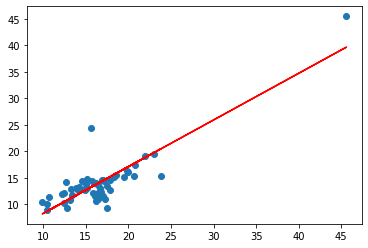

In [59]:
import matplotlib.pyplot as plt

slope, intercept, r_value, p_value, std_err = stats.linregress(below_p_18_to_35, hs_grads_pct)
print('--SLOPE--')
print(str(slope))
print('')
print('--INTERCEPT--')
print(str(intercept))
print('')
print('--R VAL--')
print(str(r_value))
print('')
print('--p_value--')
print(str(p_value))
print('')
print('--STAND. DEV. ERR--')
print(str(std_err))
print('')
print('** Deducted, r-squared')
print(str(r_value ** 2))

# takes x value, slope && y-intercept
def yVal(xVal, slope, int):
    return slope * xVal + int

# using existing data and y = mx+b equation, make best-fit-line y-values
fitLineYVals = yVal(below_p_18_to_35, slope, intercept)

#plot the scatter again
plt.scatter(below_p_18_to_35, hs_grads_pct)

# superimpose the line, red
plt.plot(below_p_18_to_35, fitLineYVals, c="r")
plt.show()

## bestfit some college

--SLOPE--
0.7185670110250055

--INTERCEPT--
-1.9577839135299033

--R VAL--
0.8949007170832104

--p_value--
3.767996742352939e-19

--STAND. DEV. ERR--
0.05067578948965014

** Deducted, r-squared
0.8008472934360442


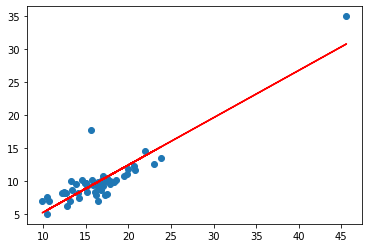

In [72]:
import matplotlib.pyplot as plt

slope, intercept, r_value, p_value, std_err = stats.linregress(below_p_18_to_35, some_college_pct)
print('--SLOPE--')
print(str(slope))
print('')
print('--INTERCEPT--')
print(str(intercept))
print('')
print('--R VAL--')
print(str(r_value))
print('')
print('--p_value--')
print(str(p_value))
print('')
print('--STAND. DEV. ERR--')
print(str(std_err))
print('')
print('** Deducted, r-squared')
print(str(r_value ** 2))

# takes x value, slope && y-intercept
def yVal(xVal, slope, int):
    return slope * xVal + int

# using existing data and y = mx+b equation, make best-fit-line y-values
fitLineYVals = yVal(below_p_18_to_35, slope, intercept)

#plot the scatter again
plt.scatter(below_p_18_to_35, some_college_pct)

# superimpose the line, red
plt.plot(below_p_18_to_35, fitLineYVals, c="r")
plt.show()

## Bachelors +

--SLOPE--
0.3052920482701085

--INTERCEPT--
-0.5531104924775674

--R VAL--
0.8462244247455171

--p_value--
2.810875634967096e-15

--STAND. DEV. ERR--
0.027185095342024942

** Deducted, r-squared
0.7160957770358812


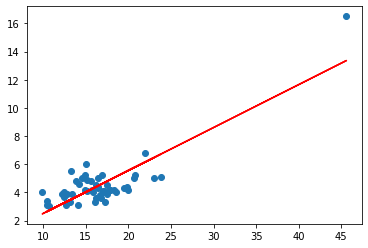

In [66]:
import matplotlib.pyplot as plt

slope, intercept, r_value, p_value, std_err = stats.linregress(below_p_18_to_35, bach_plus_pct)
print('--SLOPE--')
print(str(slope))
print('')
print('--INTERCEPT--')
print(str(intercept))
print('')
print('--R VAL--')
print(str(r_value))
print('')
print('--p_value--')
print(str(p_value))
print('')
print('--STAND. DEV. ERR--')
print(str(std_err))
print('')
print('** Deducted, r-squared')
print(str(r_value ** 2))

# takes x value, slope && y-intercept
def yVal(xVal, slope, int):
    return slope * xVal + int

# using existing data and y = mx+b equation, make best-fit-line y-values
fitLineYVals = yVal(below_p_18_to_35, slope, intercept)

#plot the scatter again
plt.scatter(below_p_18_to_35, bach_plus_pct)

# superimpose the line, red
plt.plot(below_p_18_to_35, fitLineYVals, c="r")
plt.show()

